In [1]:
import numpy as np
%matplotlib inline

In [2]:
def hypothesis(x, thetas):
    return np.dot(x, thetas)

In [3]:
def cost(x, y, theta):
    m = len(y)
    J = 0
    h = hypothesis(x, theta)
    J = (1/(2 * m)) * np.sum(np.square(h - y))
    return J

In [4]:
def gradientDescent(X, y, theta, alpha, iter):
    m = len(y)
    theta = theta.copy()
    theta_history = []
    J_history = []
    
    for i in range(iter):
        h = np.dot(X, theta)
        loss = h - y
#         print(h.shape, y.shape,loss.shape, theta.shape, X.shape)
        theta = theta - (alpha / m) * X.T @ loss
#         print(theta.shape)
        theta_history.append(theta)
        J_history.append(cost(X, y, theta))
    return theta_history, J_history

In [5]:
np.random.seed(42)
x = 2 * np.random.rand(100,1).reshape((50, 2))
np.random.seed(41)
y = (4 + 3 * x[:, 0] + 2 *x[:, 1]).reshape((50,1))
x = np.c_[np.ones(len(x)), x]
thetas = np.ones((x.shape[1],1))
x.shape, thetas.shape, y.shape

((50, 3), (3, 1), (50, 1))

In [ ]:
np.random.seed(42)
x = 2 * np.random.rand(100,1)
np.random.seed(41)
y = 4 + 3 * x + np.random.randn(100,1)
x = np.c_[np.ones(len(x)), x]
thetas = np.ones((x.shape[1],1))
x.shape, thetas.shape, y.shape

In [6]:
(x.T @ y).shape

(3, 1)

In [7]:
z = hypothesis(x, thetas)

In [8]:
(z - y).shape

(50, 1)

In [9]:
t_hist, c_hist = gradientDescent(x, y, thetas, 0.1, 1000)

In [10]:
thetas = t_hist[-1]
thetas.shape
# cost(x, y, thetas)

(3, 1)

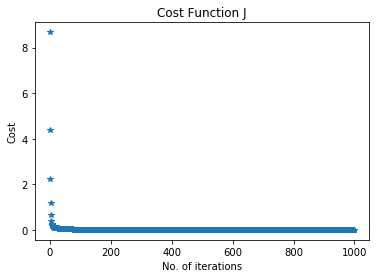

In [11]:
import matplotlib.pyplot as plt
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(c_hist, marker='*', linestyle="None")
plt.show()

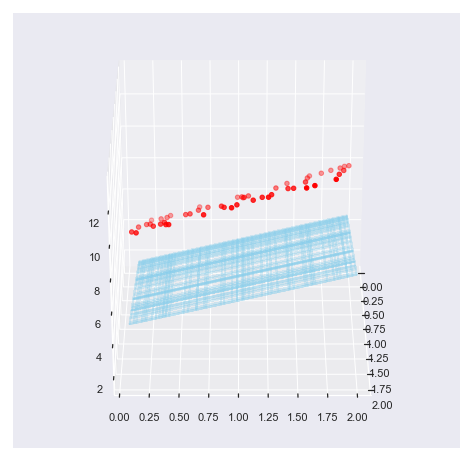

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Image
import seaborn as sns
%matplotlib inline  
# %matplotlib notebook
# %pylab
sns.set()




fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection='3d')
xx, yy = np.meshgrid(x[:, 1], x[:, 2])
h = thetas[0] + xx * thetas[1] + yy * thetas[2]

line1 = ax.plot_wireframe(xx, yy, h, alpha=0.3, color='blue')
line2 = ax.scatter(x[:, 1], x[:, 2], y, color='red')

def update(num):
    thetas = t_hist[num]
    ax.clear()
    h = thetas[0] + xx * thetas[1] + yy * thetas[2]
    line1 = ax.plot_wireframe(xx, yy, h, alpha=0.3, color='skyblue')
    line2 = ax.scatter(x[:, 1], x[:, 2], y, color='red')
    ax.view_init(30, num* 360/12)
    return [line1, line2]

ani = animation.FuncAnimation(fig, update, 1000, interval=100, blit=True)


In [ ]:
ani.save('animation.gif', writer='imagemagick', fps=1)
Image(url='animation.gif')